# Customer Segmentation Data

### The aim of the project is to cluster customers using KMeans Clustering to provide valuable insights into customer spending. 


### The attributes of the dataset used in this project are Customer ID, Age, Gender, Annual Income and Spending Score. The Spending Score is assigned to customers based on defined parameters such as past spending. The dataset used in this project is available at https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python. 


### Importing Libraries 

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Reading the Data

In [3]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c636fc76e81e44bd8261ef4e4e5bb742 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ihlO7o9BLyTQevRwhUa7U3Z9vobhyJj3iMQmT7uVBGYw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c636fc76e81e44bd8261ef4e4e5bb742)

body = client_c636fc76e81e44bd8261ef4e4e5bb742.get_object(Bucket='clustering-donotdelete-pr-d3nxrpdjh62jy2',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

### Exploration of the data 

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()         # Checking for Null values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [67]:
data1= data.drop('CustomerID', axis=1)
data1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Data Visualisation 

<Figure size 720x720 with 0 Axes>

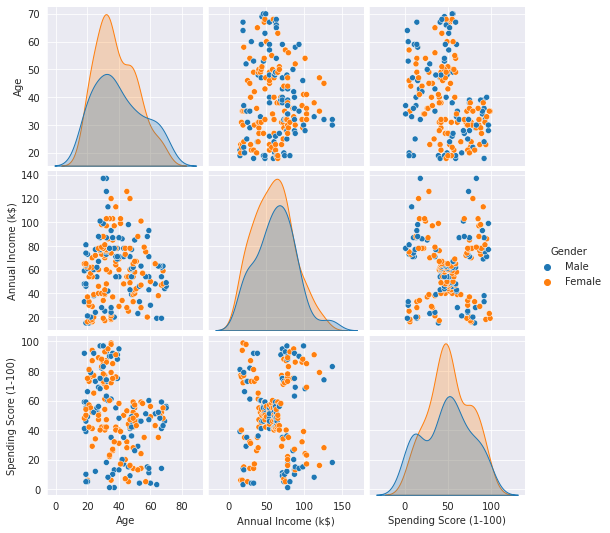

<Figure size 720x720 with 0 Axes>

In [68]:
sns.pairplot(data1, hue='Gender')
plt.figure(figsize=(10,10))

### Selecting attributes Annual Income and Spending Score.

In [16]:
X = data[['Annual Income (k$)','Spending Score (1-100)']].values # Gives the values in these two attributes
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Cluster selection 

### To find WCSS (Within Clusters Sum of Sqaures) value for different number of clusters 

In [17]:
WCSS = [] 

for i in range(1,11):  
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    
    WCSS.append(kmeans.inertia_)
    

### To plot Elbow Point graph

Text(0.5, 1.0, 'The Elbow Point graph')

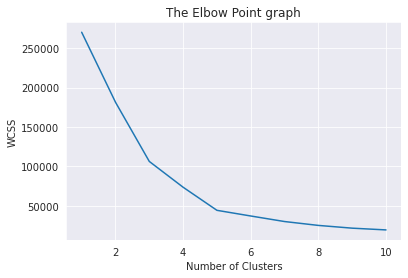

In [72]:
sns.set_style("darkgrid")
plt.plot(range(1,11),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Point graph')

### The optimum number of Clusters is 5.

## Clustering using K-Means 

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# To return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
Y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

### Visualising all the Clusters 

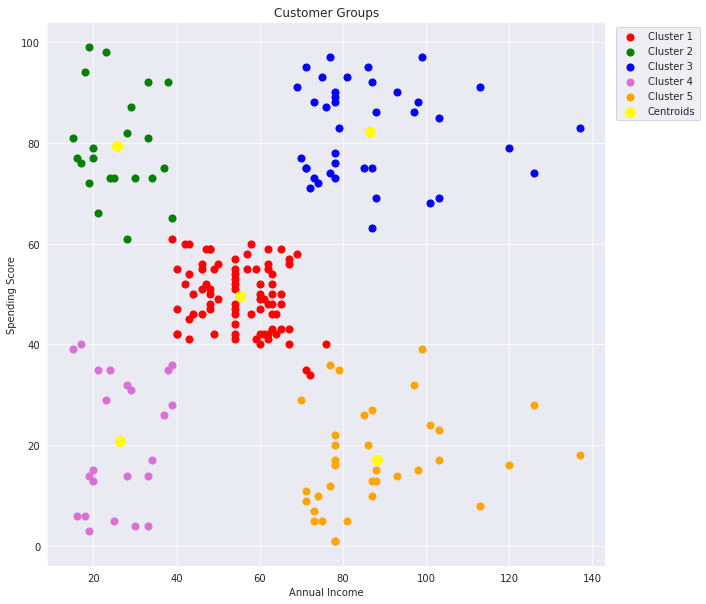

In [81]:
plt.figure(figsize=(10,10))

# To plot Clusters
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='orchid', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')

# To plot Centroids 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Groups')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')


### We observe that Cluster 4 and Cluster 5 have a lower Spending Score than the Clusters 1-3. We increase spending the marketing team can provide customers in Cluster 4 and 5 with loyalty discounts or exclusive offers to entice them into spending more and thus increase their Spending Score.